In [3]:
library('igraph')
library('Matrix')
library('pracma')


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union


Attaching package: ‘pracma’

The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu



# Part1
## Question1
### a

In [5]:
p1 <- 0.003
p2 <- 0.004
p3 <- 0.01
p4 <- 0.05
p5 <- 0.1
g1 <- erdos.renyi.game(1000, p1, directed=F)
g2 <- erdos.renyi.game(1000, p2, directed=F)
g3 <- erdos.renyi.game(1000, p3, directed=F)
g4 <- erdos.renyi.game(1000, p4, directed=F)
g5 <- erdos.renyi.game(1000, p5, directed=F)

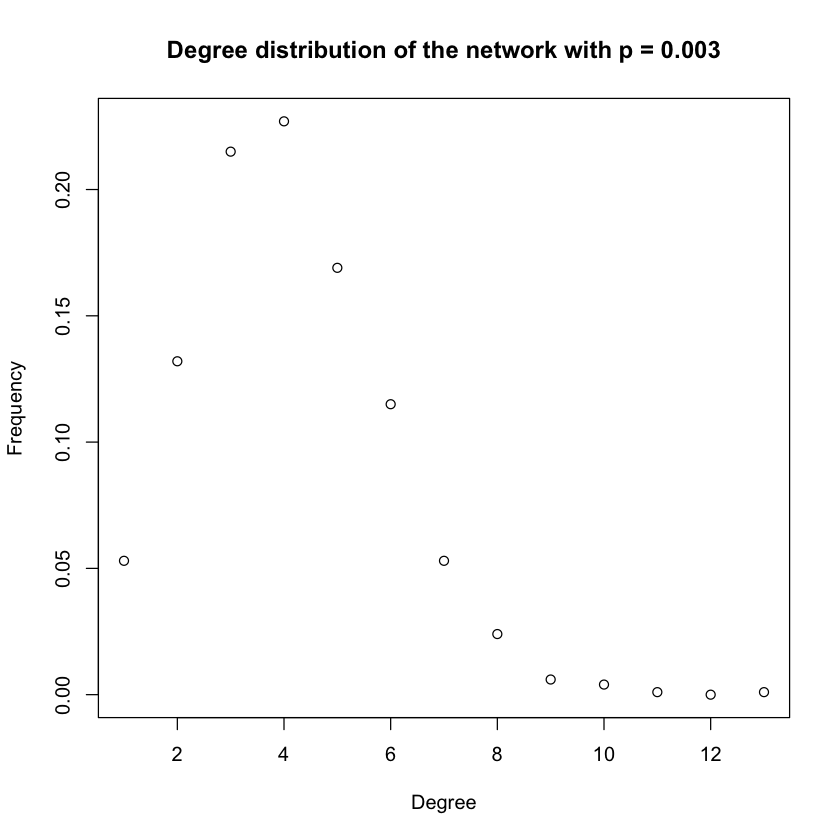

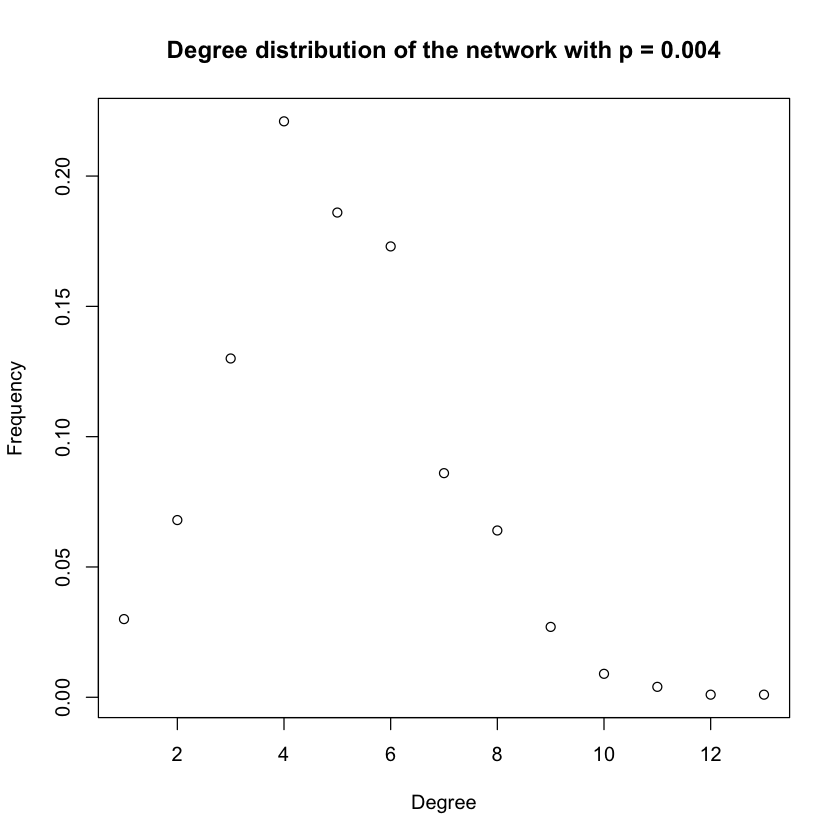

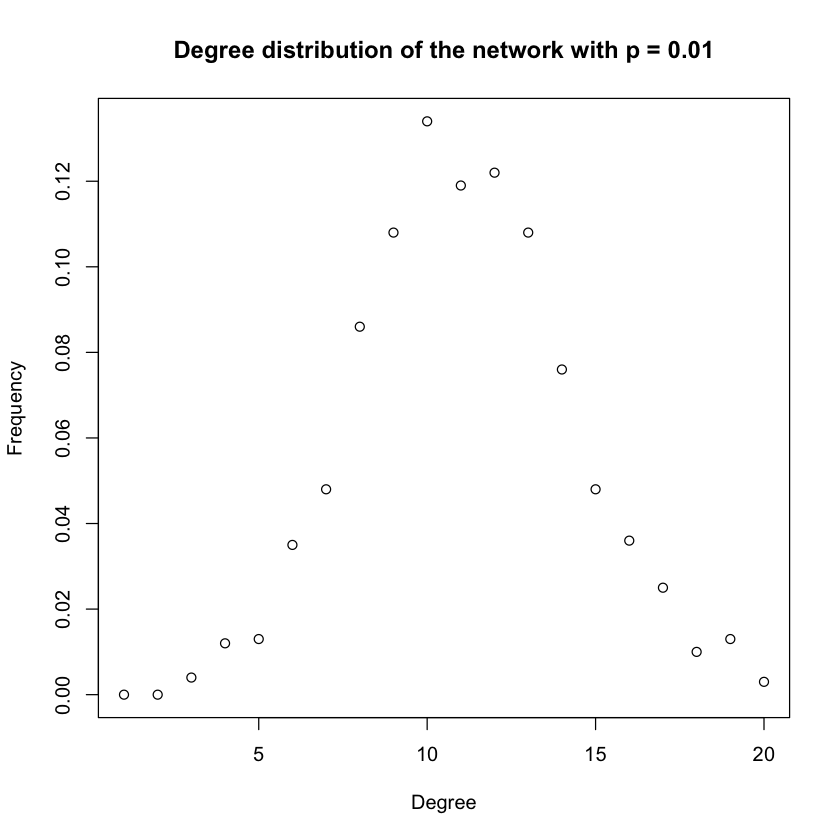

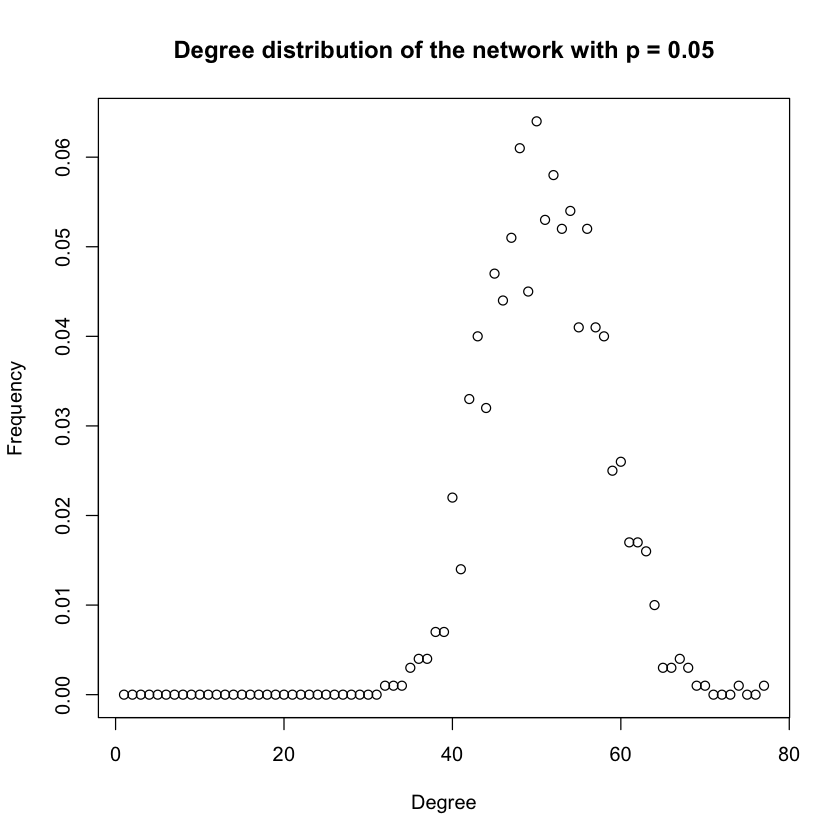

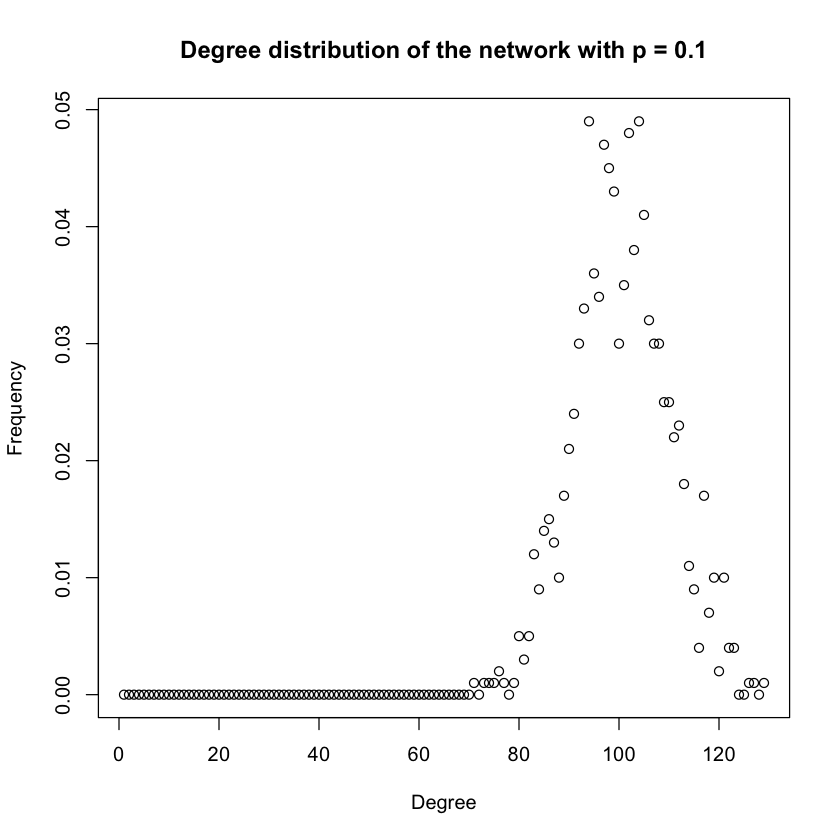

In [6]:
plot(degree.distribution(g1),main="Degree distribution of the network with p = 0.003",xlab="Degree",ylab="Frequency")
plot(degree.distribution(g2),main="Degree distribution of the network with p = 0.004",xlab="Degree",ylab="Frequency")
plot(degree.distribution(g3),main="Degree distribution of the network with p = 0.01",xlab="Degree",ylab="Frequency")
plot(degree.distribution(g4),main="Degree distribution of the network with p = 0.05",xlab="Degree",ylab="Frequency")
plot(degree.distribution(g5),main="Degree distribution of the network with p = 0.1",xlab="Degree",ylab="Frequency")

In [7]:
summary(degree(g1))
var(degree(g1))
summary(degree(g2))
var(degree(g2))
summary(degree(g3))
var(degree(g3))
summary(degree(g4))
var(degree(g4))
summary(degree(g5))
var(degree(g5))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   3.000   3.086   4.000  12.000 

[1] 3.129734

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   3.000   4.000   3.924   5.000  12.000 

[1] 3.838062

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    8.00   10.00   10.12   12.00   19.00 

[1] 9.661261

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  31.00   45.00   50.00   50.02   55.00   76.00 

[1] 43.56931

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  70.00   93.00   99.00   99.51  106.00  128.00 

[1] 86.47428

##### The distributions are like a bell curve but skew to their own average degrees, which are the probability p times the number of nodes, 1000. With higher probability, the graph tends to be more likely to have vertices with more edges. Therefore, for small probability, like p = 0.003, there will be more vertices with 0 edge in the graph than that of p = 0.01.  
The theoretical value of the average degree is equal to the total number of nodes times the probability.  
    E(g1) = 1000 * 0.003 = 3, which is approximate equal to the empirical mean, 3.01, with 3.33% difference.  
    E(g2) = 1000 * 0.004 = 4, which is approximate equal to the empirical mean, 3.938, with 1.55% difference.  
    E(g3) = 1000 * 0.01 = 10, which is approximate equal to the empirical mean, 10.13, with 1.3% difference.  
    E(g4) = 1000 * 0.05 = 50, which is approximate equal to the empirical mean, 49.85, with 0.30% difference.  
    E(g5) = 1000 * 0.1 = 100, which is approximate equal to the empirical mean, 99.49, with 0.51% difference.  
As for variance, the distribution is binomial distribution, meaning the variance is np(1-p).  
V(g1) = 1000 * 0.003 * (1 - 0.003) = 2.991, similar to the empircal value, 3.181, with 6.35% difference.  
V(g2) = 1000 * 0.004 * (1 - 0.004) = 3.984, similar to the empircal value, 4.091, with 2.69% difference.  
V(g3) = 1000 * 0.01 * (1 - 0.01) = 9.9, similar to the empircal value, 9.622, with 2.81% difference.  
V(g4) = 1000 * 0.05 * (1 - 0.05) = 47.5, similar to the empircal value, 45.001, with 5.26% difference.  
V(g5) = 1000 * 0.1 * (1 - 0.1) = 90, similar to the empircal value, 96.160, with 6.84% difference.

### 1.2 Create networks using preferential attachment mode

#### (a) Create an undirected network with n = 1000 nodes, with preferential attachment model 

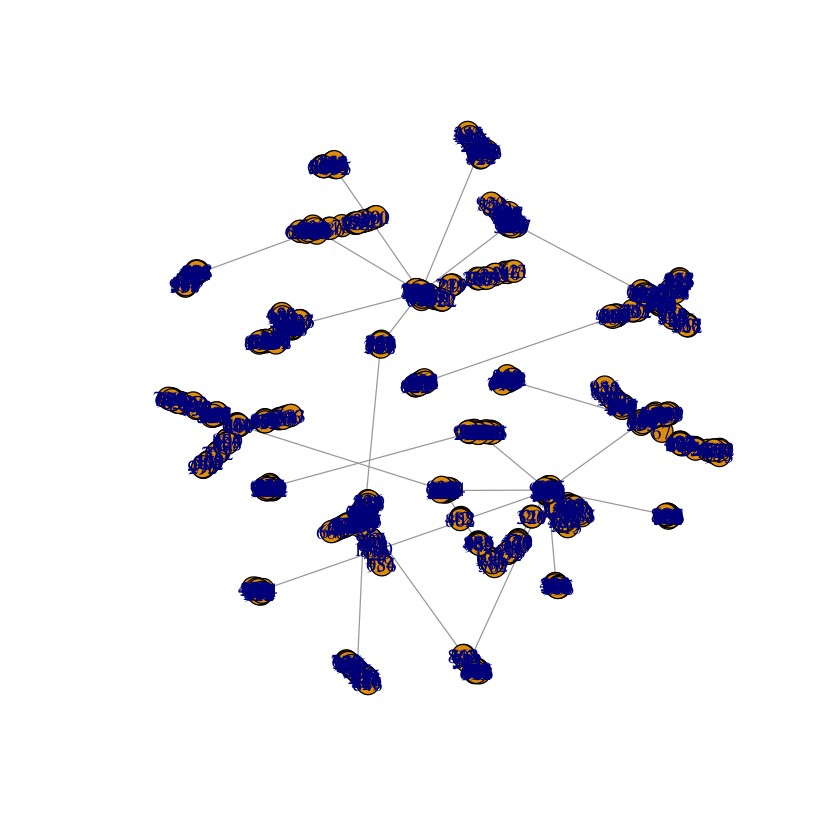

In [20]:
g2a <- barabasi.game(1000, m=1, directed=F)
plot(g2a,vertex.size=8)

#### By definiation of preferential attachment model, the graph will always be connected since a node always choose a node $i$ with $degree(i)$ >= 1. The probability of picking a node without any edges is 0. This can be proven using mathematical induction.

####  (b) Use fast greedy method to find the community structure

In [83]:
g2 <- fastgreedy.community(g2)
g2m <- modularity(g2)
print(g2m)

[1] 0.9290802


##### Modualrity is 0.929

####  (c) Try to generate a larger network with 10000 nodes using the same model

In [91]:
g2c <- barabasi.game(10000, m=1, directed=F)
m2 <- fastgreedy.community(g2c)
mm2 <- modularity(m2)
print(mm2)

[1] 0.9769325


#### Modularity is 0.9759

#### (d) Plot the degree distribution in a log-log scale for both n =
1000, 10000, then estimate the slope of the plot

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“12 y values <= 0 omitted from logarithmic plot”Warning message in xy.coords(x, y, xlabel, ylabel, log):
“27 y values <= 0 omitted from logarithmic plot”

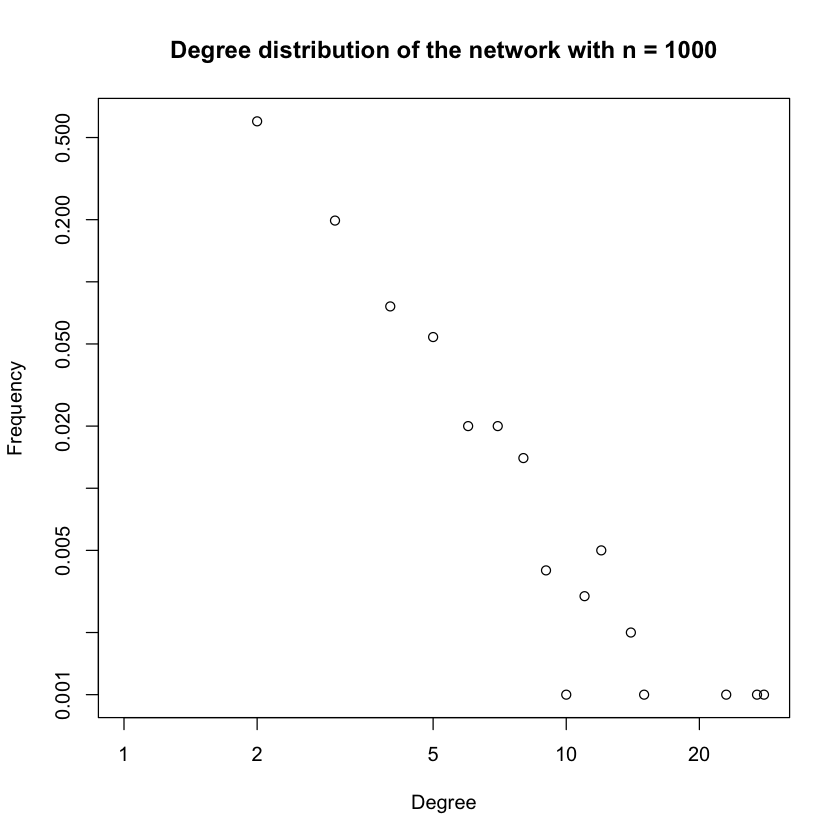

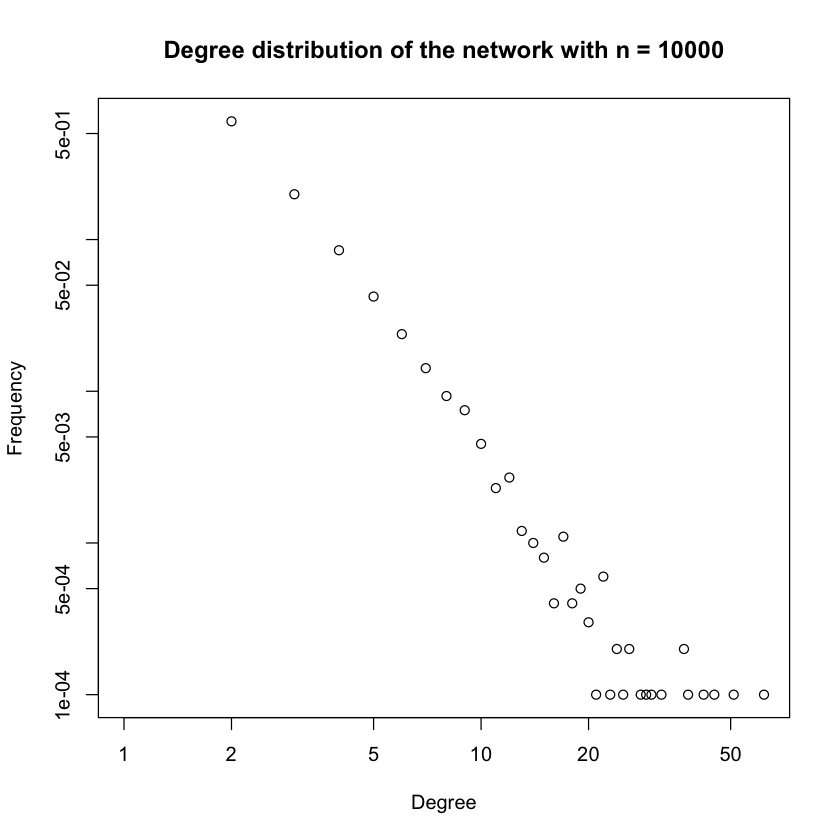

In [31]:
plot(degree.distribution(g2a),main="Degree distribution of the network with n = 1000",xlab="Degree",ylab="Frequency", log = "xy")
plot(degree.distribution(g2c),main="Degree distribution of the network with n = 10000",xlab="Degree",ylab="Frequency", log ="xy")


##### Slope is rooughly 0.033333

#### 2e

Warning message in subgraph(g2a, subg):
“At structural_properties.c:1984 :igraph_subgraph is deprecated from igraph 0.6, use igraph_induced_subgraph instead”Warning message in xy.coords(x, y, xlabel, ylabel, log):
“7 y values <= 0 omitted from logarithmic plot”Warning message in subgraph(g2a, subg):
“At structural_properties.c:1984 :igraph_subgraph is deprecated from igraph 0.6, use igraph_induced_subgraph instead”

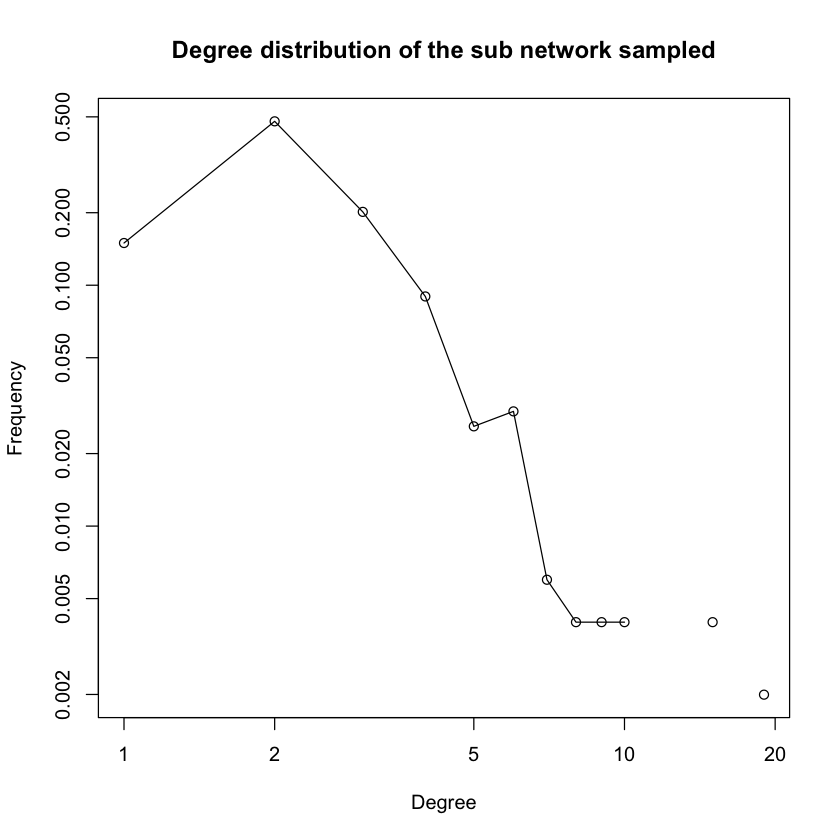

In [84]:
vert <- V(g2a)
set.seed(1)
subg <- seq_len(0)
for(v in vert){
    neigh <- neighbors(g2a, v)
    node <- sample(neigh, size = 1)
    subg <- c(subg, node) 
}
plot(degree.distribution(subgraph(g2a, subg)),main="Degree distribution of the sub network sampled",xlab="Degree",ylab="Frequency", log = "xy")
lines(degree.distribution(subgraph(g2a, subg)))

#### The degree distribution of the subgraph is very similar to its parent graph

#### (f)  Estimate the expected degree of a node that is added at time step $i$

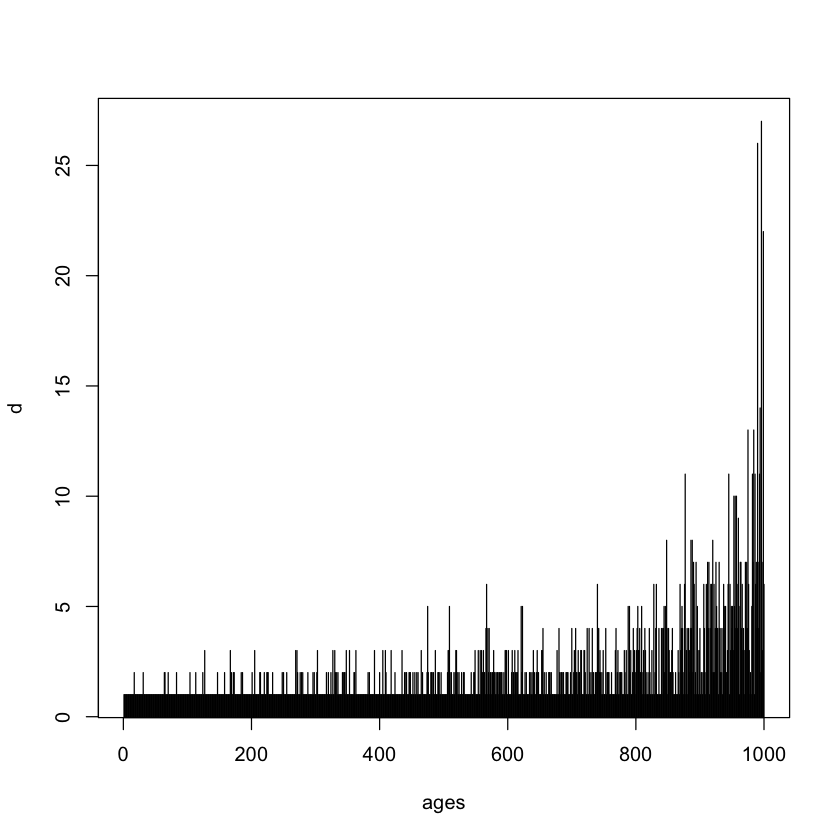

In [129]:
d <- degree(g2a, v = V(g2a))
ages <- 1001 - as.numeric(V(g2a))

plot(x=ages,y=d, type='h')


In [163]:
part2 = function (m){
    
#### a-f, m=2
graph <- barabasi.game(1000, m=m, directed=F)
c <- fastgreedy.community(graph)
mod <- modularity(c)
print(sprintf("The modularity is %s with n= 1000, m=%s", mod, m))

graph2 <- barabasi.game(10000, m=m, directed=F)
c <- fastgreedy.community(graph2)
mod <- modularity(c)
print(sprintf("The modularity is %s with n= 10000, m=%s", mod, m))

plot(degree.distribution(graph),main=sprintf("Degree distribution of the network with n = 1000, m=%s", m),xlab="Degree",ylab="Frequency", log = "xy")
plot(degree.distribution(graph2),main=sprintf("Degree distribution of the network with n = 10000, m=%s", m),xlab="Degree",ylab="Frequency", log = "xy")

vert <- V(graph)
set.seed(1)
subg <- seq_len(0)
for(v in vert){
    neigh <- neighbors(graph, v)
    node <- sample(neigh, size = 1)
    subg <- c(subg, node) 
}
plot(degree.distribution(subgraph(graph, subg)),main=sprintf("Degree distribution of the subnetwork sampled, m=%s", m),xlab="Degree",ylab="Frequency", log = "xy")
lines(degree.distribution(subgraph(graph, subg)))
    
d <- degree(graph, v = V(graph))
ages <- 1001 - as.numeric(V(graph))

plot(x=ages,y=d, type='h',main=sprintf("Expected Degree V.S Age, m=%s", m))

}





[1] "The modularity is 0.520462215606834 with n= 1000, m=2"
[1] "The modularity is 0.53095305271938 with n= 10000, m=2"


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“72 y values <= 0 omitted from logarithmic plot”Warning message in xy.coords(x, y, xlabel, ylabel, log):
“112 y values <= 0 omitted from logarithmic plot”Warning message in subgraph(graph, subg):
“At structural_properties.c:1984 :igraph_subgraph is deprecated from igraph 0.6, use igraph_induced_subgraph instead”Warning message in xy.coords(x, y, xlabel, ylabel, log):
“49 y values <= 0 omitted from logarithmic plot”

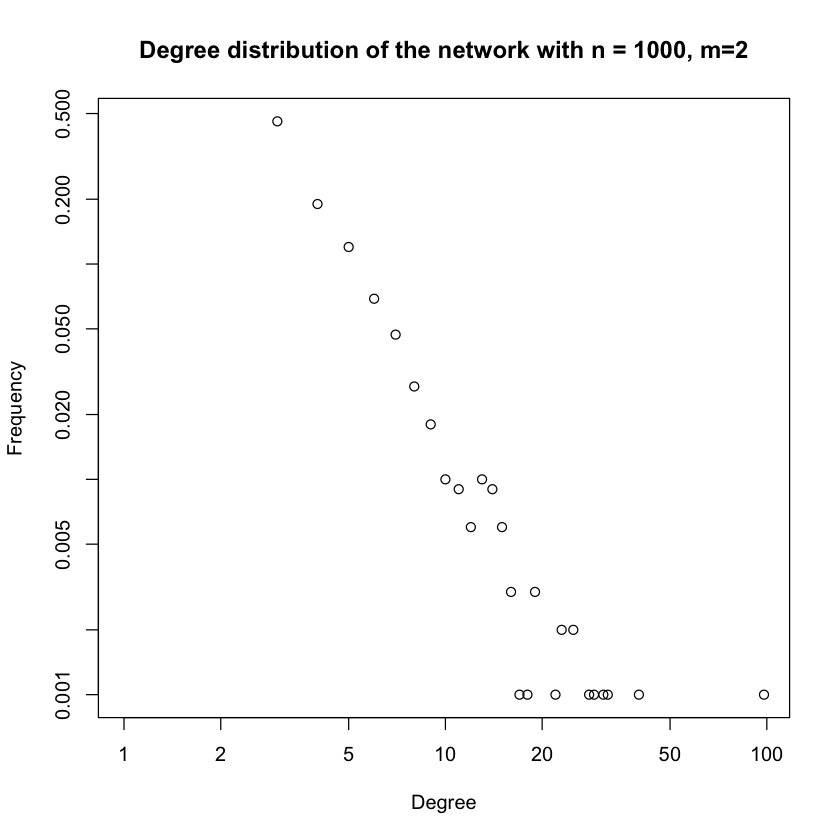

Warning message in subgraph(graph, subg):
“At structural_properties.c:1984 :igraph_subgraph is deprecated from igraph 0.6, use igraph_induced_subgraph instead”

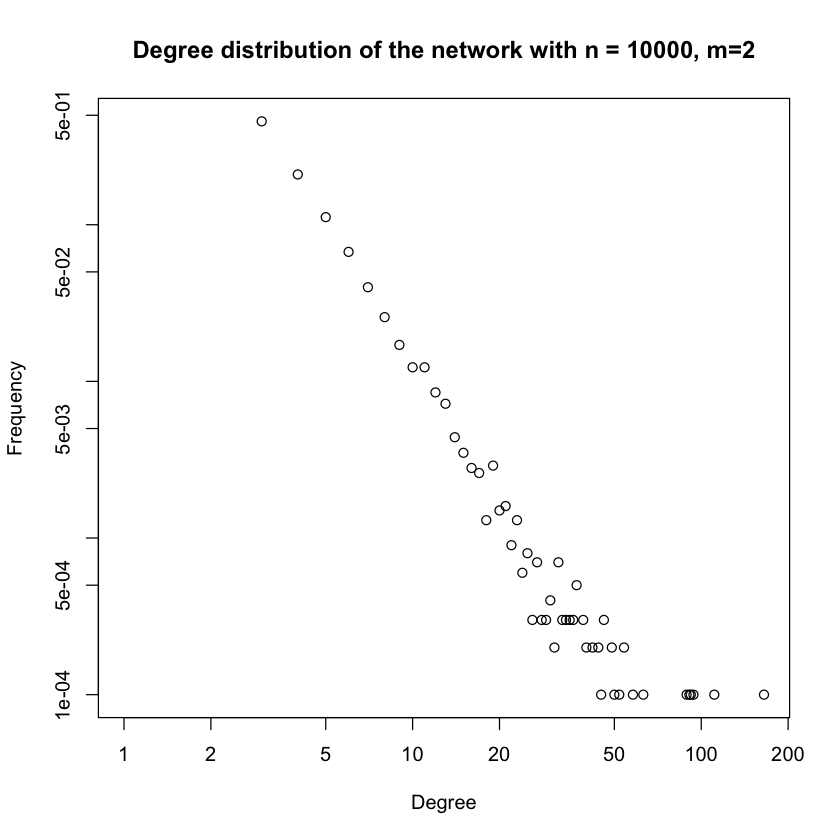

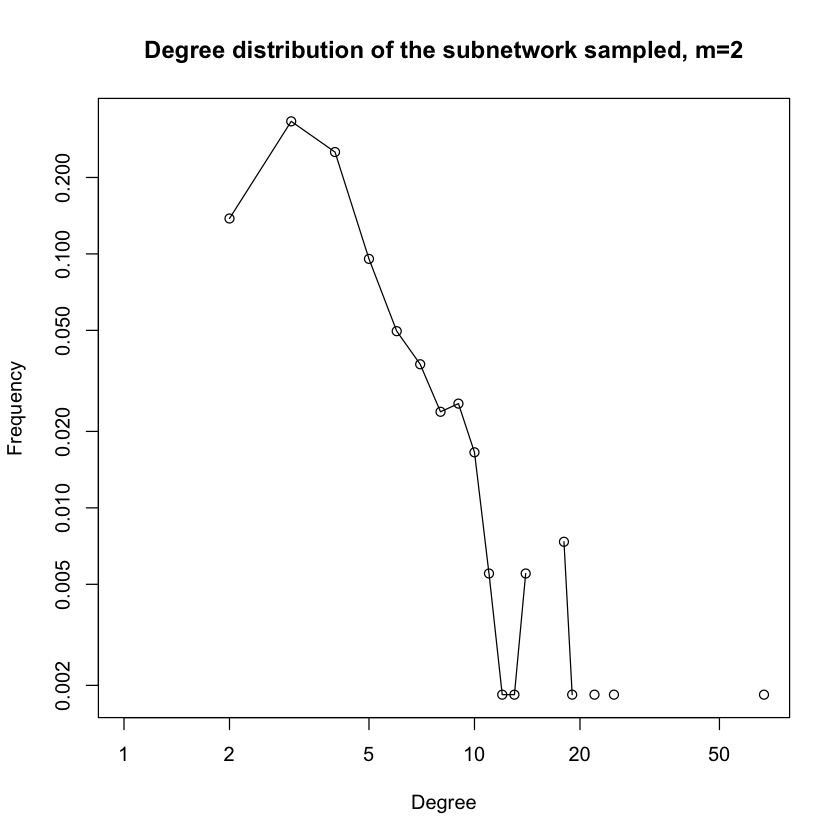

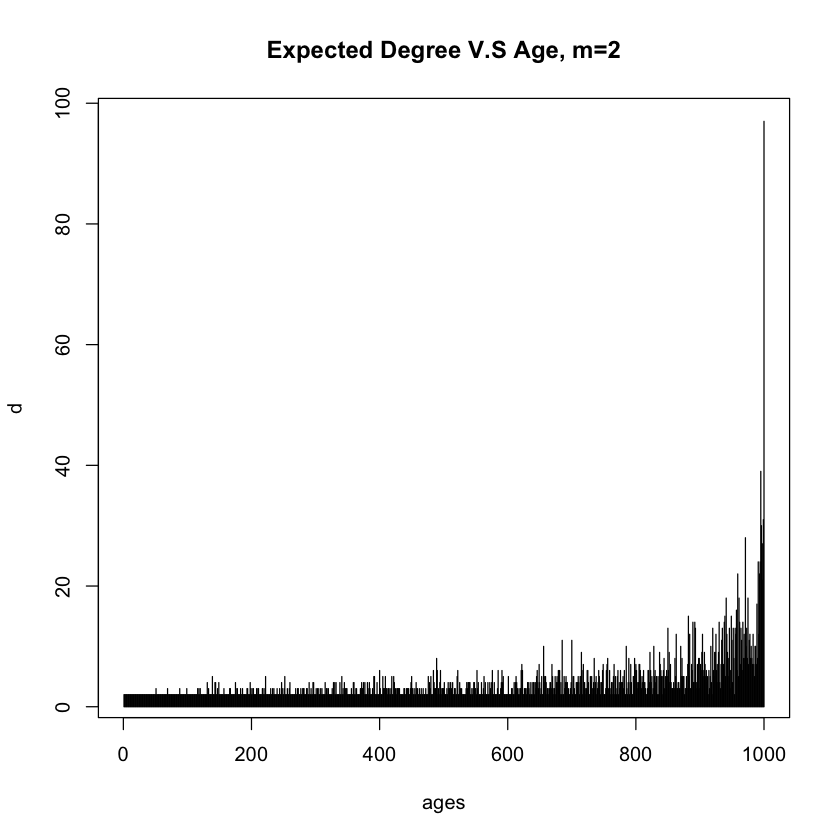

In [164]:
part2(2)

#### (h) Stub matching

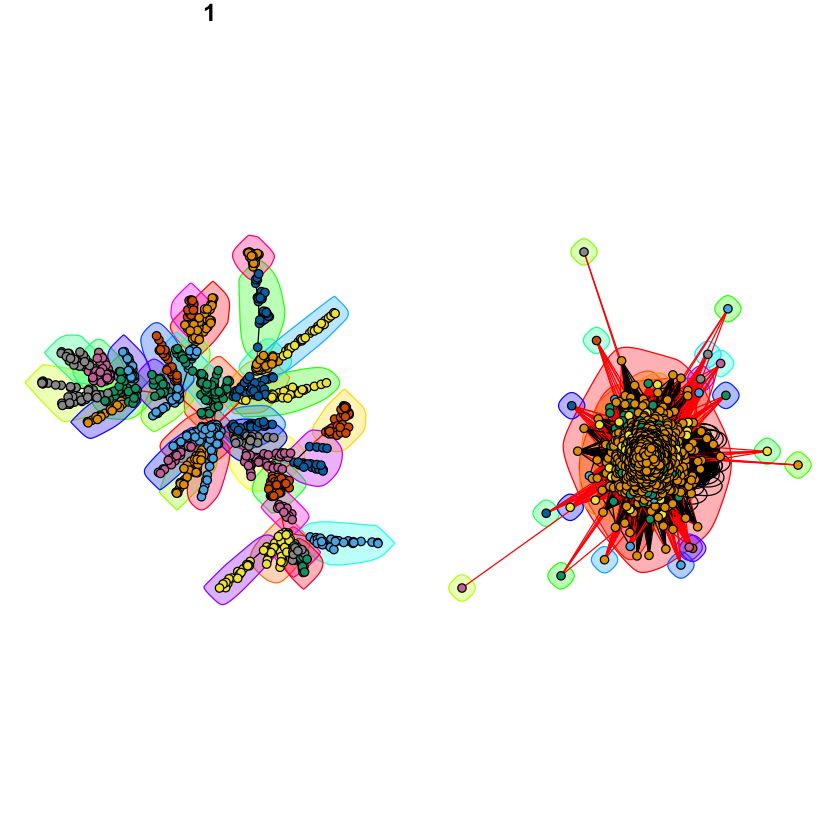

In [171]:
gh <- barabasi.game(1000, m=1, directed=F)
communitygh <- fastgreedy.community(gh)

vert <- V(gh)
gstub <- degree.sequence.game(vert)
communitygs <- walktrap.community(gstub)



par(mfrow=c(1,2), mar=rep(1,4))
layout <-layout.fruchterman.reingold(gh)
plot(communitygh, gh, main="Community Plot of n=1000, m=1, PA Model", layout=layout, vertex.label=NA, vertex.size=5,  edge.arrow.size=.2)

layout <-layout.fruchterman.reingold(gstub)
plot(communitygs, gstub,main="Community Plot of n=1000, m=1, Stub Matching Model" layout=layout, vertex.label=NA, vertex.size=5,  edge.arrow.size=.2)

### 2 Random Walk On Newworks

In [ ]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    dist_matrix = distances(er2, v=V(er2), to=V(er2))   
    vs <- start_node
    start <- start_node
    dist <- seq_len(0)
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[vs, ]
        v = sample(1:vcount(g), 1, prob = PMF)
        print( dist_matrix[start,v])
    }
    
    return(dist)
}

In [ ]:
p = 0.01
er2 <- erdos.renyi.game(1000, p, directed=F)
start = sample(1:vcount(er2), 1)

set.seed(1)
dist = random_walk(er2, 100, start)

In [207]:
dist

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1